In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from steg import binarize, hide

## Hide flag

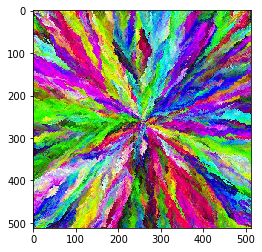

In [3]:
img = cv2.imread('base.jpg')
orig = img.copy()
plt.imshow(img);

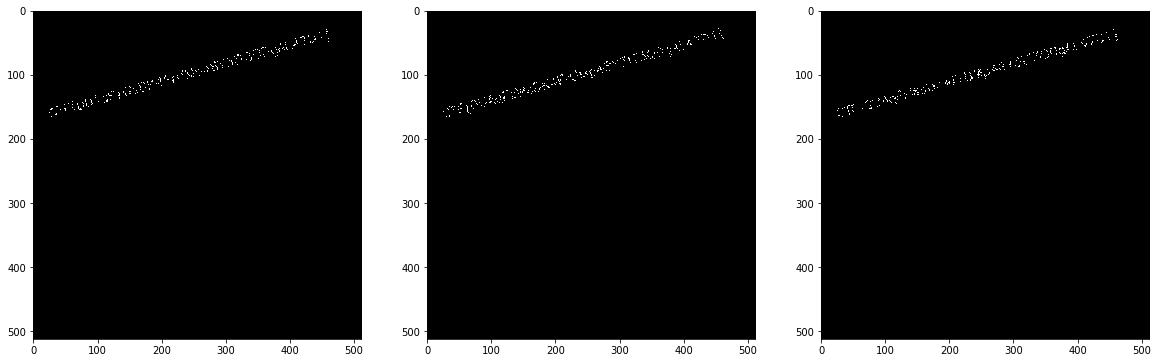

In [4]:
flag_1 = binarize(cv2.imread('img_1.jpg', 0))
flag_2 = binarize(cv2.imread('img_2.jpg', 0))
flag_3 = binarize(cv2.imread('img_3.jpg', 0))

plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.imshow(flag_1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(flag_2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(flag_3, cmap='gray');

CPU times: user 2.59 s, sys: 81.1 ms, total: 2.67 s
Wall time: 2.56 s


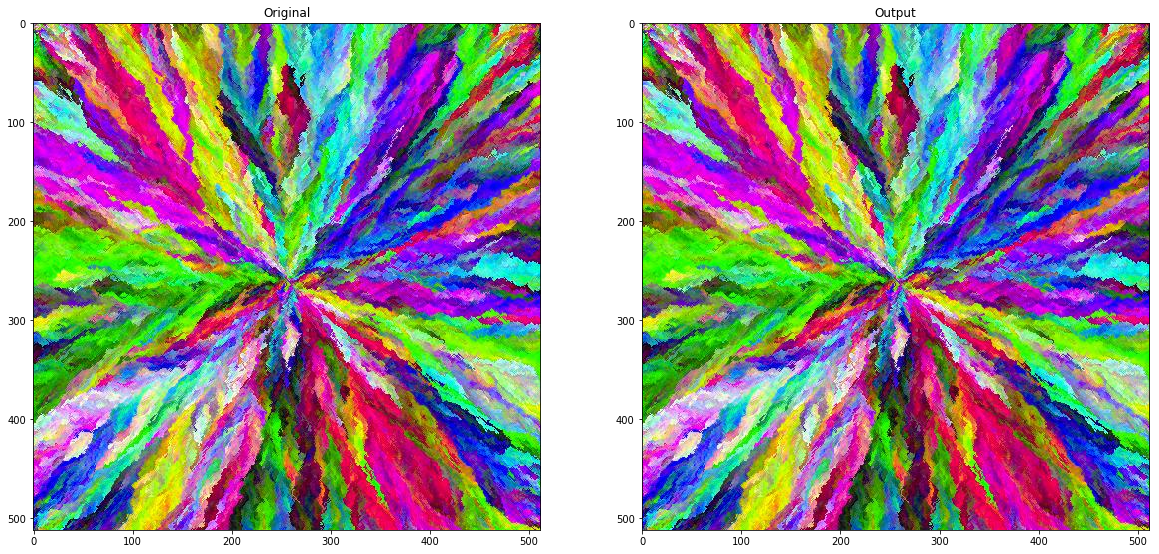

In [5]:
%%time
img[:, :, 0] = hide(img[:, :, 0], flag_1)
img[:, :, 1] = hide(img[:, :, 1], flag_2)
img[:, :, 2] = hide(img[:, :, 2], flag_3)

plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(orig)
plt.subplot(1, 2, 2)
plt.title('Output')
plt.imshow(img);

## Retrieve flag

In [6]:
ret = np.zeros_like(img)
ret.shape

(512, 512, 3)

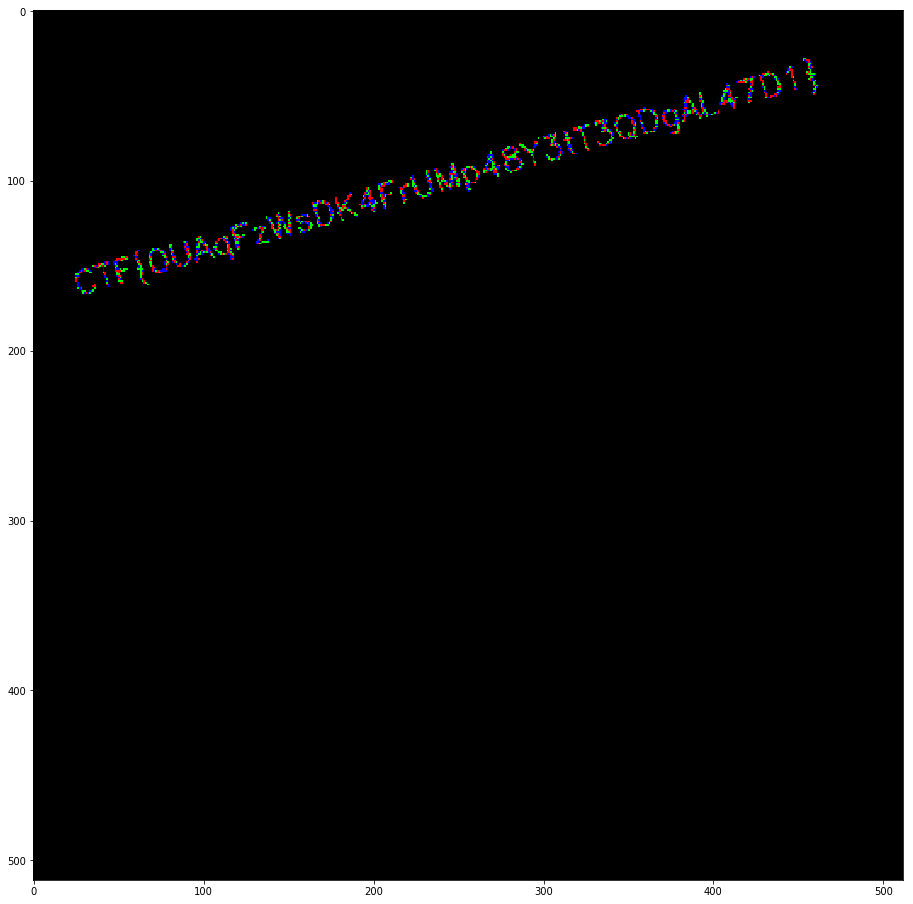

In [7]:
h, w, c = ret.shape

for i in range(h):
    for j in range(w):
        for k in range(c):
            ret[i, j, k] = img[i, j, k] & 1

plt.figure(figsize=(16, 16))
plt.imshow(ret * 255);